## Gaussian kernel

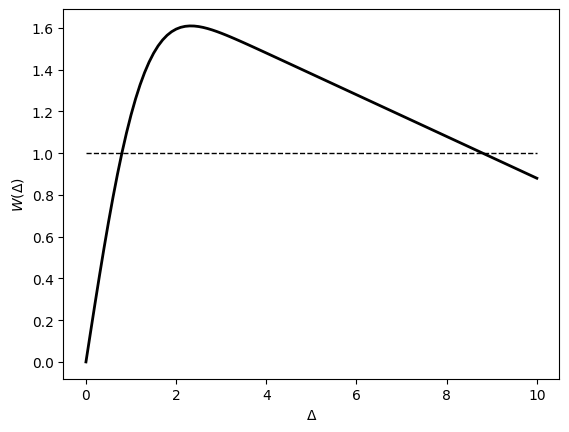

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# delta range
delta = np.arange(0, 10.1, 0.1)

# Parameters for Gaussian kernel
p = [1.5, 1, 0.1]  # [A, sigma, g_i]

# Gaussian kernel function
def w(x, A, sigma, g_i):
    return A * np.exp(-0.5 * (x)**2 / sigma**2) - g_i

# Compute theta
theta = []
for k in delta:
    theta_i, _ = quad(w, 0, k, args=(p[0], p[1], p[2]))
    theta.append(theta_i)

# Plot results
plt.figure()
plt.plot(delta, theta, '-k', linewidth=2)
plt.xlabel('$\Delta$')
plt.ylabel('$W(\Delta)$')

# Check bump existence for a particular value of theta
theta_value = 1
plt.plot(delta, np.ones(len(delta)) * theta_value, '--k', linewidth=1)
plt.show()


## Mexican-hat kernel

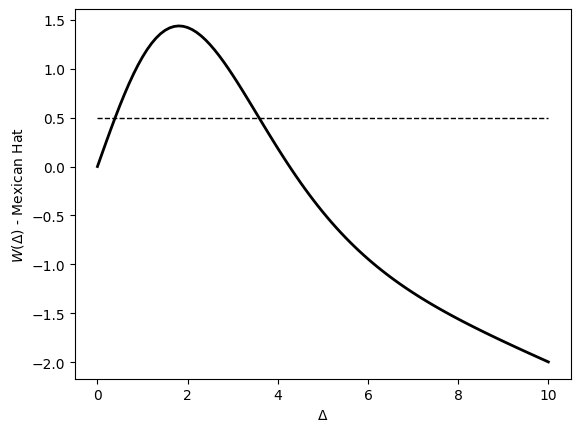

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# delta range
delta = np.arange(0, 10.1, 0.1)

# Parameters for Mexican-hat kernel
p = [3, 1.5, 1.5, 3, 0.2]  # [A_ex, s_ex, A_inh, s_inh, g_i]

# Mexican-hat kernel function
def mexican_hat_kernel(x, A_ex, s_ex, A_inh, s_inh, g_i):
    return A_ex * np.exp(-0.5 * (x)**2 / s_ex**2) - A_inh * np.exp(-0.5 * (x)**2 / s_inh**2) - g_i

# Compute theta for Mexican-hat
theta_mexican_hat = []
for k in delta:
    theta_i, _ = quad(mexican_hat_kernel, 0, k, args=(p[0], p[1], p[2], p[3], p[4]))
    theta_mexican_hat.append(theta_i)

# Plot results for Mexican-hat
plt.figure()
plt.plot(delta, theta_mexican_hat, '-k', linewidth=2)
plt.xlabel('$\Delta$')
plt.ylabel('$W(\Delta)$ - Mexican Hat')

# Check bump existence for a particular value of theta
theta_value = 0.5
plt.plot(delta, np.ones(len(delta)) * theta_value, '--k', linewidth=1)
plt.show()

## Oscillatory kernel

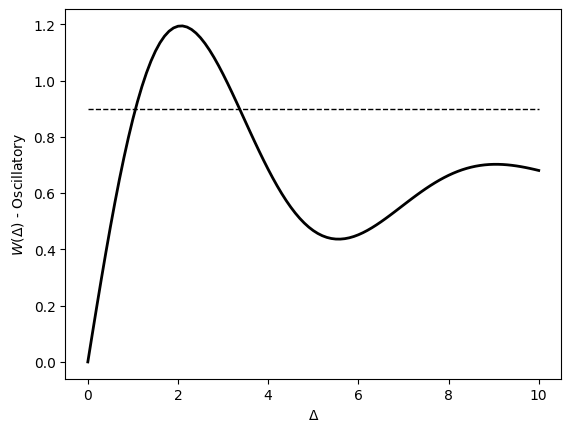

In [6]:
# Parameters for Oscillatory kernel
p = [1, 0.3, 0.9]  # [A, b, alpha]

# Oscillatory kernel function
def oscillatory_kernel(x, A, b, alpha):
    return A * (np.exp(-b * np.abs(x)) * ((b * np.sin(np.abs(alpha * x))) + np.cos(alpha * x)))

# Compute theta for Oscillatory
theta_oscillatory = []
for k in delta:
    theta_i, _ = quad(oscillatory_kernel, 0, k, args=(p[0], p[1], p[2]))
    theta_oscillatory.append(theta_i)

# Plot results for Oscillatory
plt.figure()
plt.plot(delta, theta_oscillatory, '-k', linewidth=2)
plt.xlabel('$\Delta$')
plt.ylabel('$W(\Delta)$ - Oscillatory')

# Check bump existence for a particular value of theta
theta_value = 0.9
plt.plot(delta, np.ones(len(delta)) * theta_value, '--k', linewidth=1)
plt.show()